In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime


Profitability

In [2]:
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv("Data Exercise - Data.csv")

In [4]:
df.head()

,Date,TimeOfDay,Spot,BuyTrader,SellTrader
0,03/01/2022,09:32:05,99.96,3,0
1,03/01/2022,09:34:11,99.98,4,5
2,03/01/2022,09:34:29,99.97,4,5
3,03/01/2022,09:34:44,99.96,4,0
4,03/01/2022,09:39:02,99.88,3,1


In [5]:

unique_traders = sorted(set(df["BuyTrader"].unique()).union(set(df["SellTrader"].unique())))


buy_counts_daily = df.groupby("Date")["BuyTrader"].value_counts().unstack()


sell_counts_daily = df.groupby("Date")["SellTrader"].value_counts().unstack()


buy_counts_daily = buy_counts_daily.reindex(columns=unique_traders)
sell_counts_daily = sell_counts_daily.reindex(columns=unique_traders)


net_positions_daily = buy_counts_daily.subtract(sell_counts_daily, fill_value=0)
net_positions_daily.fillna(0,inplace=True)


In [6]:
net_positions_daily

BuyTrader,0,1,2,3,4,5,6
Date,,,,,,,
01/02/2022,-40.0,0.0,0.0,40.0,0.0,0.0,0.0
01/03/2022,-39.0,0.0,0.0,49.0,0.0,0.0,-10.0
01/04/2022,-45.0,0.0,0.0,45.0,0.0,0.0,0.0
01/06/2022,-38.0,0.0,0.0,48.0,0.0,0.0,-10.0
01/07/2022,-62.0,0.0,0.0,52.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...
31/01/2022,-35.0,0.0,0.0,35.0,0.0,0.0,0.0
31/03/2022,-54.0,0.0,0.0,44.0,0.0,0.0,10.0
31/05/2022,-44.0,0.0,0.0,34.0,0.0,0.0,10.0


In [7]:
non_zero_days_per_trader = (net_positions_daily != 0).sum()
non_zero_days_per_trader

BuyTrader
0    251
1      0
2      0
3    251
4      0
5      0
6    115
dtype: int64

In [8]:
net_positions = net_positions_daily.sum()
net_positions

BuyTrader
0   -10575.0
1        0.0
2        0.0
3    10570.0
4        0.0
5        0.0
6        5.0
dtype: float64

In [9]:
buy_counts = df['BuyTrader'].value_counts()
sell_counts = df['SellTrader'].value_counts()

In [10]:
buy_counts

BuyTrader
0    46188
4    21113
2    17878
5    16906
3    10570
1     7018
6      575
Name: count, dtype: int64

In [11]:
sell_counts

SellTrader
0    56763
4    21113
2    17878
5    16906
1     7018
6      570
Name: count, dtype: int64

In [12]:
completed_trades = pd.DataFrame({'BuyTrader': buy_counts, 'SellTrader': sell_counts}).min(axis=1)
completed_trades

0    46188.0
1     7018.0
2    17878.0
3    10570.0
4    21113.0
5    16906.0
6      570.0
dtype: float64

In [13]:
completed_and_open_trades = pd.DataFrame({'BuyTrader': buy_counts, 'SellTrader': sell_counts}).max(axis=1)
completed_and_open_trades

0    56763.0
1     7018.0
2    17878.0
3    10570.0
4    21113.0
5    16906.0
6      575.0
dtype: float64

In [14]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [15]:
df_buy = df.groupby(["BuyTrader"])["Spot"].sum().reset_index()
df_sell = df.groupby(["SellTrader"])["Spot"].sum().reset_index()

In [16]:
df_buy.rename(columns={'BuyTrader': 'TraderId'}, inplace=True)
df_sell.rename(columns={'SellTrader': 'TraderId'}, inplace=True)



In [17]:
pnl_df = pd.merge(df_buy, df_sell, on="TraderId", how="outer")

In [18]:
pnl_df.rename(columns={'Spot_x': 'Buy', 'Spot_y': 'Sell'}, inplace=True)


In [19]:
pnl_df['Buy'].fillna(0,inplace=True)
pnl_df['Sell'].fillna(0,inplace=True)

/tmp/ipykernel_1269773/1824928055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pnl_df['Buy'].fillna(0,inplace=True)
/tmp/ipykernel_1269773/1824928055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [20]:
pnl_df['Total Pnl'] = pnl_df['Sell']- pnl_df['Buy']

In [21]:
pnl_df

,TraderId,Buy,Sell,Total Pnl
0,0,4747152.58,5830606.06,1083453.48
1,1,720816.37,720707.48,-108.89
2,2,1838427.62,1839353.78,926.16
3,3,1084699.54,0.00,-1084699.54
4,4,2169869.79,2170403.10,533.31
5,5,1738444.55,1738680.61,236.06
6,6,59286.82,58946.24,-340.58


In [22]:
closing_spot = df.iloc[120247]['Spot']
closing_spot

np.float64(115.84)

In [23]:
unrealized_pos_mv = net_positions*closing_spot
unrealized_pos_mv

BuyTrader
0   -1225008.0
1          0.0
2          0.0
3    1224428.8
4          0.0
5          0.0
6        579.2
dtype: float64

In [24]:
realised_and_unrealized_profit = pnl_df['Total Pnl']+unrealized_pos_mv

In [25]:
realised_and_unrealized_profit

0   -141554.52
1      -108.89
2       926.16
3    139729.26
4       533.31
5       236.06
6       238.62
dtype: float64

In [26]:
profit_per_trade = realised_and_unrealized_profit/completed_and_open_trades
profit_per_trade

0    -2.493782
1    -0.015516
2     0.051804
3    13.219419
4     0.025260
5     0.013963
6     0.414991
dtype: float64

Behaviour

In [27]:
df['Day'] = df['Date'].dt.day_name()

In [28]:

df["Hour"] = pd.to_datetime(df["TimeOfDay"], format="%H:%M:%S").dt.hour


buy_activity = df.groupby(["Hour", "BuyTrader"]).size().unstack(fill_value=0)


sell_activity = df.groupby(["Hour", "SellTrader"]).size().unstack(fill_value=0)


trader_activity_by_time = buy_activity.add(sell_activity, fill_value=0)

In [29]:


buy_activity = df.groupby(["Day", "Hour", "BuyTrader"]).size().unstack(fill_value=0)
sell_activity = df.groupby(["Day", "Hour", "SellTrader"]).size().unstack(fill_value=0)




In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [31]:

df["TimeOfDay"] = pd.to_datetime(df["TimeOfDay"], format="%H:%M:%S")

# Extract 15-minute intervals from the timestamp
df["MinuteInterval"] = (df["TimeOfDay"].dt.minute // 5) * 5  # Groups into 0, 15, 30, 45


df["TimeBucket"] = df["Hour"].astype(str) + ":" + df["MinuteInterval"].astype(str).str.zfill(2)



# Group by Day, TimeBucket, and Trader ID for both BuyTrader and SellTrader
buy_activity_5min = df.groupby(["TimeBucket", "BuyTrader"]).size().unstack(fill_value=0)
sell_activity_5min = df.groupby(["TimeBucket", "SellTrader"]).size().unstack(fill_value=0)



# Merge both datasets to analyze total trader activity per 15-minute interval
trader_activity_5min = buy_activity_5min.add(sell_activity_5min, fill_value=0)





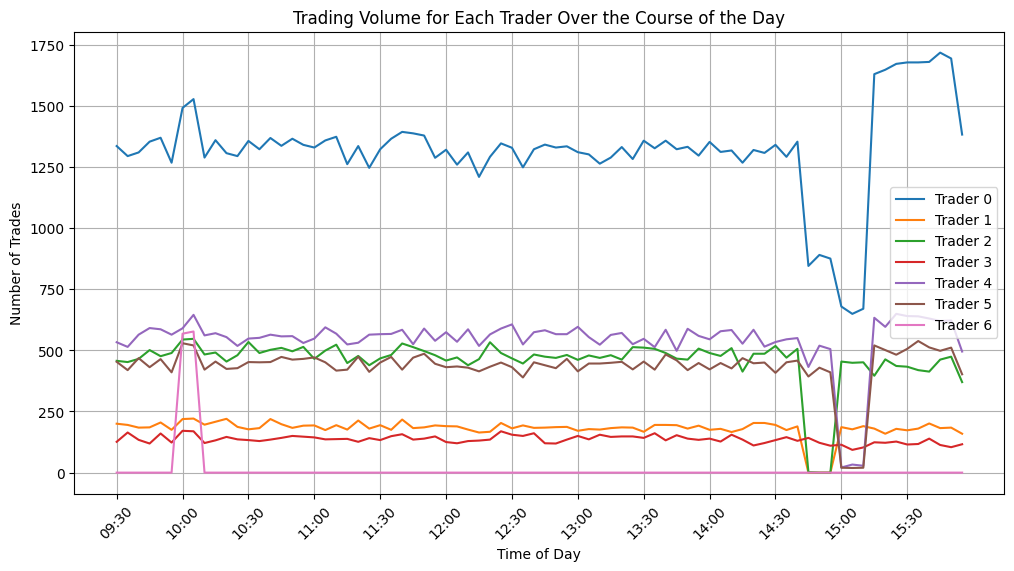

In [32]:


# Convert the index (time) to a proper datetime format for plotting
trader_activity_5min.index = pd.to_datetime(trader_activity_5min.index, format="%H:%M")
trader_activity_5min = trader_activity_5min.sort_index()
# Plot trading volume over the course of the day for each trader
plt.figure(figsize=(12, 6))

for trader in trader_activity_5min.columns:
    plt.plot(trader_activity_5min.index, trader_activity_5min[trader], label=f"Trader {trader}")

# Formatting the plot
plt.xlabel("Time of Day")
plt.ylabel("Number of Trades")
plt.title("Trading Volume for Each Trader Over the Course of the Day")
plt.legend()

plt.xticks(trader_activity_5min.index[::6], trader_activity_5min.index.strftime("%H:%M")[::6], rotation=45)
plt.grid()

# Show the plot
plt.show()


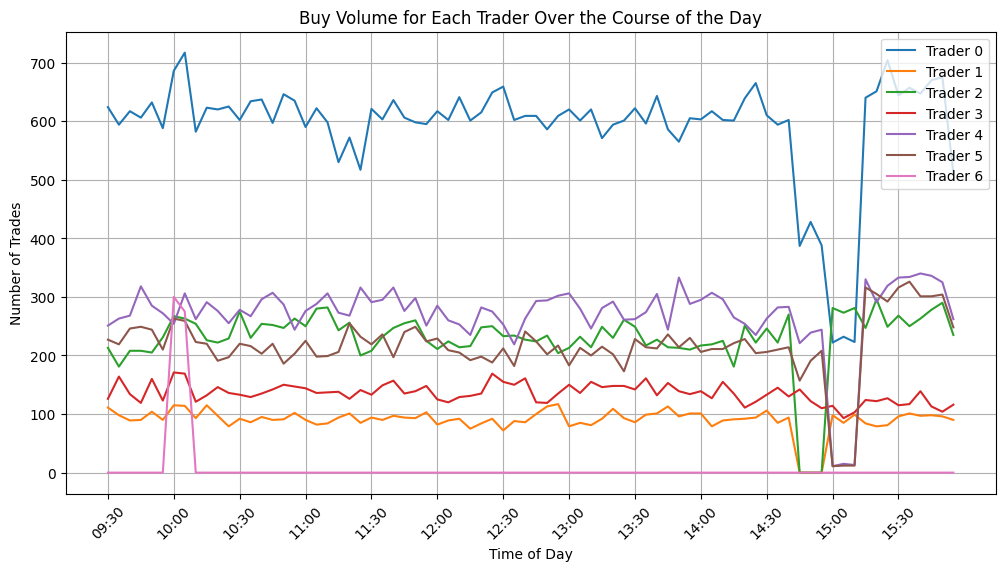

In [33]:



buy_activity_5min.index = pd.to_datetime(buy_activity_5min.index, format="%H:%M")
buy_activity_5min = buy_activity_5min.sort_index()
# Plot trading volume over the course of the day for each trader
plt.figure(figsize=(12, 6))

for trader in buy_activity_5min.columns:
    plt.plot(buy_activity_5min.index, buy_activity_5min[trader], label=f"Trader {trader}")

# Formatting the plot
plt.xlabel("Time of Day")
plt.ylabel("Number of Trades")
plt.title("Buy Volume for Each Trader Over the Course of the Day")
plt.legend()

plt.xticks(buy_activity_5min.index[::6], buy_activity_5min.index.strftime("%H:%M")[::6], rotation=45)
plt.grid()

# Show the plot
plt.show()


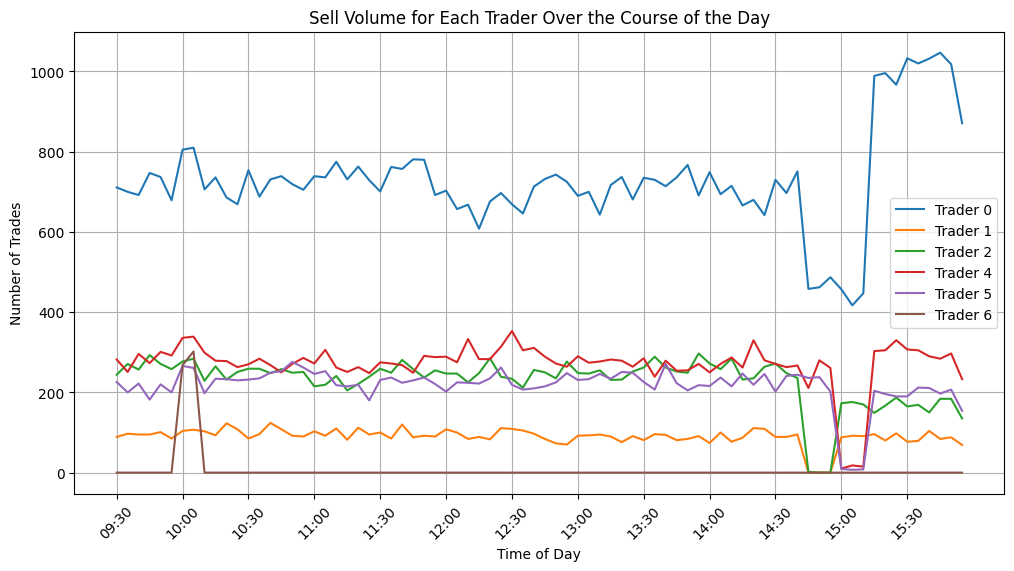

In [34]:



sell_activity_5min.index = pd.to_datetime(sell_activity_5min.index, format="%H:%M")
sell_activity_5min = sell_activity_5min.sort_index()
# Plot trading volume over the course of the day for each trader
plt.figure(figsize=(12, 6))

for trader in sell_activity_5min.columns:
    plt.plot(sell_activity_5min.index, sell_activity_5min[trader], label=f"Trader {trader}")

# Formatting the plot
plt.xlabel("Time of Day")
plt.ylabel("Number of Trades")
plt.title("Sell Volume for Each Trader Over the Course of the Day")
plt.legend()

plt.xticks(sell_activity_5min.index[::6], sell_activity_5min.index.strftime("%H:%M")[::6], rotation=45)
plt.grid()

# Show the plot
plt.show()


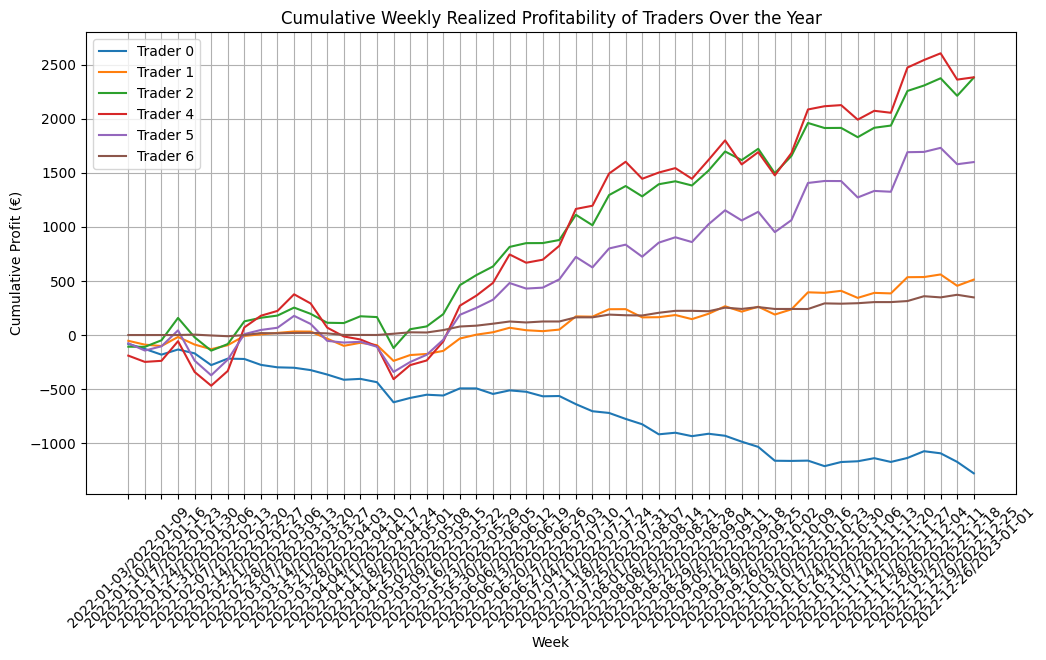

In [35]:


# Load data and parse datetime correctly
df = pd.read_csv("Data Exercise - Data.csv", dayfirst=True)
df["Timestamp"] = pd.to_datetime(df["Date"] + " " + df["TimeOfDay"], dayfirst=True)

# Add a column for weekly grouping
df["Week"] = df["Timestamp"].dt.to_period("W")


# Dictionary to track positions and P&L
trader_positions = {}
trader_pnl = []

# Process each trade
for _, row in df.iterrows():
    spot_price = row["Spot"]
    buyer = row["BuyTrader"]
    seller = row["SellTrader"]
    week = row["Week"]

    # Buyer acquires position
    if buyer not in trader_positions:
        trader_positions[buyer] = []
    trader_positions[buyer].append(spot_price)

    # Seller realizes profit/loss
    if seller in trader_positions and trader_positions[seller]:
        buy_price = trader_positions[seller].pop(0)  # FIFO
        profit = spot_price - buy_price
        trader_pnl.append({"Trader": seller, "Week": week, "Profit": profit})

# Convert P&L data to DataFrame
pnl_df = pd.DataFrame(trader_pnl)

# Aggregate profits by trader and week
pnl_df = pnl_df.groupby(["Trader", "Week"], as_index=False)["Profit"].sum()

# Pivot without duplicates issue
pnl_pivot = pnl_df.pivot(index="Week", columns="Trader", values="Profit").fillna(0)

# Compute cumulative profit for each trader
pnl_cumulative = pnl_pivot.cumsum()

# Plot cumulative trader profitability over time
plt.figure(figsize=(12, 6))
for trader in pnl_cumulative.columns:
    plt.plot(pnl_cumulative.index.astype(str), pnl_cumulative[trader], label=f"Trader {trader}")

plt.xlabel("Week")
plt.ylabel("Cumulative Profit (€)")
plt.title("Cumulative Weekly Realized Profitability of Traders Over the Year")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


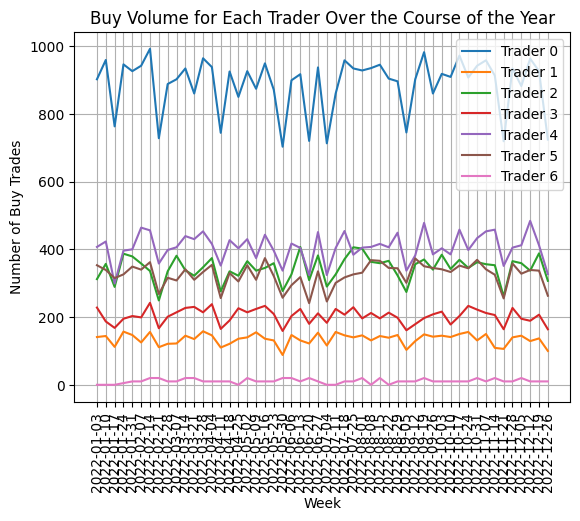

In [36]:
import matplotlib.pyplot as plt

# Calculate the weekly buy volume by trader
weekly_buy_vol = df.groupby(['Week','BuyTrader']).size().unstack().fillna(0)

# Convert the PeriodIndex to DatetimeIndex by taking the start time of each period
weekly_buy_vol.index = weekly_buy_vol.index.to_timestamp()

# Plot each trader's buy volume over the weeks
for trader in weekly_buy_vol.columns:
    plt.plot(weekly_buy_vol.index, weekly_buy_vol[trader], label=f"Trader {trader}")

# Formatting the plot
plt.xlabel("Week")
plt.ylabel("Number of Buy Trades")
plt.title("Buy Volume for Each Trader Over the Course of the Year")
plt.legend()

# Format x-axis labels for better readability
plt.xticks(weekly_buy_vol.index[::1], weekly_buy_vol.index.strftime("%Y-%m-%d")[::1], rotation=90)

plt.grid()

# Show the plot
plt.show()


In [37]:
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df.head()  # Shows the first 5 rows
df.tail()  # Shows the last 5 rows
df.sample(10)  # Shows 10 random rows



,Date,TimeOfDay,Spot,BuyTrader,SellTrader,Timestamp,Week,DayOfWeek
69577,02/08/2022,13:55:41,108.09,5,0,2022-08-02 13:55:41,2022-08-01/2022-08-07,Tuesday
13643,11/02/2022,11:40:12,90.53,2,0,2022-02-11 11:40:12,2022-02-07/2022-02-13,Friday
106281,17/11/2022,15:18:16,112.69,5,4,2022-11-17 15:18:16,2022-11-14/2022-11-20,Thursday
897,04/01/2022,15:35:24,98.12,5,0,2022-01-04 15:35:24,2022-01-03/2022-01-09,Tuesday
3267,11/01/2022,15:36:29,93.17,5,0,2022-01-11 15:36:29,2022-01-10/2022-01-16,Tuesday
26692,23/03/2022,13:06:49,96.92,4,0,2022-03-23 13:06:49,2022-03-21/2022-03-27,Wednesday
9691,01/02/2022,10:45:32,94.56,2,0,2022-02-01 10:45:32,2022-01-31/2022-02-06,Tuesday
72546,10/08/2022,14:27:27,106.35,0,4,2022-08-10 14:27:27,2022-08-08/2022-08-14,Wednesday
109165,28/11/2022,15:30:18,113.21,5,0,2022-11-28 15:30:18,2022-11-28/2022-12-04,Monday
26252,22/03/2022,13:26:05,97.16,4,0,2022-03-22 13:26:05,2022-03-21/2022-03-27,Tuesday


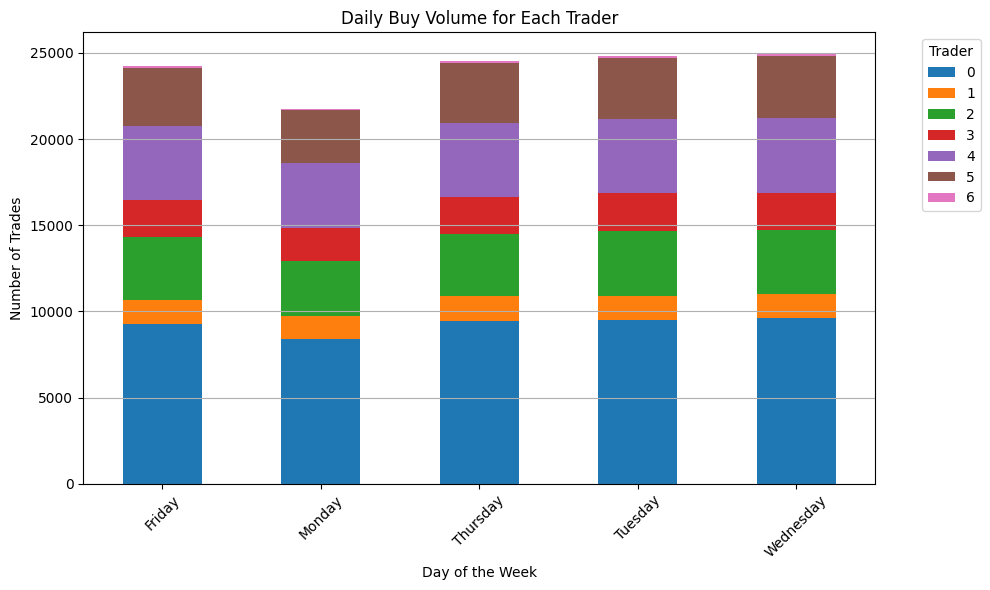

In [38]:
daily_vol = df.groupby(['DayOfWeek','BuyTrader']).size().unstack()

# Plot the daily volumes by trader
daily_vol.plot(kind='bar', stacked=True, figsize=(10, 6))

# Formatting the plot
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trades")
plt.title("Daily Buy Volume for Each Trader")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Trader", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent cutting off the legend

# Show the plot
plt.show()


In [39]:
# Initialize the transition dictionary
transition_counts_sell_sell = {0:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},1:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},2:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},3:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},
                          4:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},5:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},6:{0:0,1:0,2:0,3:0,4:0,5:0,6:0}}

# Function to calculate the transition counts and probabilities

    # Iterate through the entire DataFrame
for i in range(1, len(df)):
        current_row = df.iloc[i - 1]
        next_row = df.iloc[i]
        
        transition_counts_sell_sell[current_row["SellTrader"]][next_row["SellTrader"]]+=1
print(transition_counts_sell_sell)

{0: {0: 32733, 1: 3150, 2: 6695, 3: 0, 4: 7477, 5: 6555, 6: 152}, 1: {0: 3166, 1: 917, 2: 991, 3: 0, 4: 1043, 5: 885, 6: 16}, 2: {0: 6680, 1: 1005, 2: 5339, 3: 0, 4: 2704, 5: 2105, 6: 45}, 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 4: {0: 7448, 1: 1071, 2: 2655, 3: 0, 4: 7311, 5: 2570, 6: 58}, 5: {0: 6588, 1: 859, 2: 2144, 3: 0, 4: 2518, 5: 4748, 6: 49}, 6: {0: 147, 1: 16, 2: 54, 3: 0, 4: 60, 5: 43, 6: 250}}


In [40]:

transition_probs = {}

for trader, transitions in transition_counts_sell_sell.items():
    total_transitions = sum(transitions.values())
    if total_transitions > 0:
        transition_probs[trader] = {k: v / total_transitions for k, v in transitions.items()}
    else:
        transition_probs[trader] = {k: 0 for k in transitions}  # Handle division by zero

# Convert to DataFrame for better visualization
probs_sell_sell = pd.DataFrame(transition_probs).T


print(probs_sell_sell)


          0         1         2    3         4         5         6
0  0.576671  0.055495  0.117949  0.0  0.131725  0.115482  0.002678
1  0.451126  0.130664  0.141208  0.0  0.148618  0.126104  0.002280
2  0.373644  0.056214  0.298635  0.0  0.151247  0.117742  0.002517
3  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000
4  0.352768  0.050727  0.125752  0.0  0.346280  0.121726  0.002747
5  0.389684  0.050810  0.126819  0.0  0.148941  0.280847  0.002898
6  0.257895  0.028070  0.094737  0.0  0.105263  0.075439  0.438596


In [41]:
# Initialize the transition dictionary
transition_counts_buy_buy = {0:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},1:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},2:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},3:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},
                          4:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},5:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},6:{0:0,1:0,2:0,3:0,4:0,5:0,6:0}}

# Function to calculate the transition counts and probabilities

    # Iterate through the entire DataFrame
for i in range(1, len(df)):
        current_row = df.iloc[i - 1]
        next_row = df.iloc[i]
        
        transition_counts_buy_buy[current_row["BuyTrader"]][next_row["BuyTrader"]]+=1
print(transition_counts_buy_buy)

transition_probs = {}

for trader, transitions in transition_counts_buy_buy.items():
    total_transitions = sum(transitions.values())
    if total_transitions > 0:
        transition_probs[trader] = {k: v / total_transitions for k, v in transitions.items()}
    else:
        transition_probs[trader] = {k: 0 for k in transitions}  # Handle division by zero

# Convert to DataFrame for better visualization
probs_buy_buy = pd.DataFrame(transition_probs).T


print(probs_buy_buy)


{0: {0: 22698, 1: 2581, 2: 5281, 3: 4383, 4: 5886, 5: 5232, 6: 127}, 1: {0: 2610, 1: 863, 2: 998, 3: 579, 4: 1063, 5: 890, 6: 15}, 2: {0: 5242, 1: 991, 2: 5459, 3: 1466, 4: 2665, 5: 2007, 6: 48}, 3: {0: 4392, 1: 648, 2: 1480, 3: 985, 4: 1654, 5: 1391, 6: 20}, 4: {0: 5914, 1: 1013, 2: 2627, 3: 1753, 4: 7174, 5: 2575, 6: 57}, 5: {0: 5206, 1: 910, 2: 1983, 3: 1375, 4: 2615, 5: 4762, 6: 54}, 6: {0: 126, 1: 12, 2: 50, 3: 28, 4: 56, 5: 49, 6: 254}}
          0         1         2         3         4         5         6
0  0.491426  0.055880  0.114337  0.094895  0.127436  0.113276  0.002750
1  0.371901  0.122970  0.142206  0.082502  0.151468  0.126817  0.002137
2  0.293210  0.055431  0.305347  0.082000  0.149066  0.112261  0.002685
3  0.415516  0.061306  0.140019  0.093188  0.156481  0.131599  0.001892
4  0.280112  0.047980  0.124426  0.083029  0.339791  0.121963  0.002700
5  0.307956  0.053830  0.117303  0.081337  0.154688  0.281692  0.003194
6  0.219130  0.020870  0.086957  0.048696  0.0973

In [42]:
# Initialize the transition dictionary
transition_counts_buy_sell = {0:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},1:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},2:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},3:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},
                          4:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},5:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},6:{0:0,1:0,2:0,3:0,4:0,5:0,6:0}}

# Function to calculate the transition counts and probabilities

    # Iterate through the entire DataFrame
for i in range(1, len(df)):
        current_row = df.iloc[i - 1]
        next_row = df.iloc[i]
        
        transition_counts_buy_sell[current_row["BuyTrader"]][next_row["SellTrader"]]+=1
print(transition_counts_buy_sell)

transition_probs = {}

for trader, transitions in transition_counts_buy_sell.items():
    total_transitions = sum(transitions.values())
    if total_transitions > 0:
        transition_probs[trader] = {k: v / total_transitions for k, v in transitions.items()}
    else:
        transition_probs[trader] = {k: 0 for k in transitions}  # Handle division by zero

# Convert to DataFrame for better visualization
probs_buy_sell = pd.DataFrame(transition_probs).T


print(probs_buy_sell)


{0: {0: 16592, 1: 2847, 2: 8394, 3: 0, 4: 10397, 5: 7753, 6: 205}, 1: {0: 3446, 1: 66, 2: 1123, 3: 0, 4: 1324, 5: 1013, 6: 46}, 2: {0: 10167, 1: 1078, 2: 459, 3: 0, 4: 3369, 5: 2735, 6: 70}, 3: {0: 4696, 1: 636, 2: 1667, 3: 0, 4: 1987, 5: 1527, 6: 57}, 4: {0: 12281, 1: 1330, 2: 3402, 3: 0, 4: 613, 5: 3392, 6: 95}, 5: {0: 9332, 1: 1018, 2: 2750, 3: 0, 4: 3305, 5: 403, 6: 97}, 6: {0: 248, 1: 43, 2: 83, 3: 0, 4: 118, 5: 83, 6: 0}}
          0         1         2    3         4         5         6
0  0.359228  0.061639  0.181736  0.0  0.225102  0.167857  0.004438
1  0.491023  0.009404  0.160017  0.0  0.188658  0.144343  0.006555
2  0.568688  0.060298  0.025674  0.0  0.188444  0.152981  0.003915
3  0.444276  0.060170  0.157711  0.0  0.187985  0.144465  0.005393
4  0.581680  0.062994  0.161133  0.0  0.029034  0.160659  0.004500
5  0.552026  0.060219  0.162674  0.0  0.195504  0.023839  0.005738
6  0.431304  0.074783  0.144348  0.0  0.205217  0.144348  0.000000


In [43]:
# Initialize the transition dictionary
transition_counts_sell_buy = {0:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},1:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},2:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},3:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},
                          4:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},5:{0:0,1:0,2:0,3:0,4:0,5:0,6:0},6:{0:0,1:0,2:0,3:0,4:0,5:0,6:0}}

# Function to calculate the transition counts and probabilities

    # Iterate through the entire DataFrame
for i in range(1, len(df)):
        current_row = df.iloc[i - 1]
        next_row = df.iloc[i]
        
        transition_counts_sell_buy[current_row["SellTrader"]][next_row["BuyTrader"]]+=1
print(transition_counts_sell_buy)

transition_probs = {}

for trader, transitions in transition_counts_sell_buy.items():
    total_transitions = sum(transitions.values())
    if total_transitions > 0:
        transition_probs[trader] = {k: v / total_transitions for k, v in transitions.items()}
    else:
        transition_probs[trader] = {k: 0 for k in transitions}  # Handle division by zero

# Convert to DataFrame for better visualization
probs_sell_buy = pd.DataFrame(transition_probs).T




print(probs_sell_buy)


{0: {0: 16542, 1: 3458, 2: 10174, 3: 4683, 4: 12324, 5: 9326, 6: 255}, 1: {0: 2809, 1: 64, 2: 1120, 3: 657, 4: 1324, 5: 999, 6: 45}, 2: {0: 8419, 1: 1141, 2: 460, 3: 1656, 4: 3354, 5: 2771, 6: 77}, 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 4: {0: 10386, 1: 1350, 2: 3395, 3: 1939, 4: 607, 5: 3317, 6: 119}, 5: {0: 7832, 1: 960, 2: 2649, 3: 1579, 4: 3413, 5: 394, 6: 79}, 6: {0: 200, 1: 45, 2: 80, 3: 55, 4: 91, 5: 99, 6: 0}}
          0         1         2         3         4         5         6
0  0.291427  0.060921  0.179240  0.082502  0.217117  0.164300  0.004492
1  0.400256  0.009119  0.159590  0.093616  0.188658  0.142348  0.006412
2  0.470914  0.063821  0.025730  0.092628  0.187605  0.154995  0.004307
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
4  0.491924  0.063942  0.160801  0.091839  0.028750  0.157107  0.005636
5  0.463267  0.056785  0.156690  0.093399  0.201881  0.023305  0.004673
6  0.350877  0.078947  0.140351  0.096491  0.159649  0.173684  0.0

In [44]:


# Convert DataFrame to NumPy array
P = probs_sell_sell.to_numpy()

# Compute multi-step transition matrices
P2 = np.linalg.matrix_power(P, 2)  # 2-step probabilities
P5 = np.linalg.matrix_power(P, 5)  # 5-step probabilities
P10 = np.linalg.matrix_power(P, 10)  # 10-step probabilities
P20 = np.linalg.matrix_power(P, 20)  # 10-step probabilities
P100 = np.linalg.matrix_power(P, 100)  # 10-step probabilities

# Convert back to DataFrame for better visualization
df_P10 = pd.DataFrame(P10, index=probs_sell_sell.index, columns=probs_sell_sell.columns)
df_P20 = pd.DataFrame(P20, index=probs_sell_sell.index, columns=probs_sell_sell.columns)
df_P100 = pd.DataFrame(P100, index=probs_sell_sell.index, columns=probs_sell_sell.columns)

# Display 10-step transition probabilities
print("10-Step Transition Probabilities:")
print(df_P10)
print(df_P20)
print(df_P100)


10-Step Transition Probabilities:
          0         1         2    3         4         5         6
0  0.472046  0.058363  0.148677  0.0  0.175580  0.140594  0.004739
1  0.472046  0.058363  0.148677  0.0  0.175580  0.140594  0.004739
2  0.472046  0.058363  0.148677  0.0  0.175580  0.140594  0.004739
3  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000
4  0.472045  0.058363  0.148677  0.0  0.175581  0.140594  0.004739
5  0.472046  0.058363  0.148677  0.0  0.175580  0.140594  0.004739
6  0.471917  0.058345  0.148651  0.0  0.175544  0.140556  0.004987
          0         1         2    3        4         5        6
0  0.472045  0.058363  0.148677  0.0  0.17558  0.140594  0.00474
1  0.472045  0.058363  0.148677  0.0  0.17558  0.140594  0.00474
2  0.472045  0.058363  0.148677  0.0  0.17558  0.140594  0.00474
3  0.000000  0.000000  0.000000  0.0  0.00000  0.000000  0.00000
4  0.472045  0.058363  0.148677  0.0  0.17558  0.140594  0.00474
5  0.472045  0.058363  0.148677  0.0  0.

In [45]:


# Convert DataFrame to NumPy array
P = probs_buy_buy.to_numpy()

# Compute multi-step transition matrices
P2 = np.linalg.matrix_power(P, 2)  # 2-step probabilities
P5 = np.linalg.matrix_power(P, 5)  # 5-step probabilities
P10 = np.linalg.matrix_power(P, 10)  # 10-step probabilities
P20 = np.linalg.matrix_power(P, 20)  # 10-step probabilities
P100 = np.linalg.matrix_power(P, 100)  # 10-step probabilities

# Convert back to DataFrame for better visualization
df_P10 = pd.DataFrame(P10, index=probs_buy_buy.index, columns=probs_buy_buy.columns)
df_P20 = pd.DataFrame(P20, index=probs_buy_buy.index, columns=probs_buy_buy.columns)
df_P100 = pd.DataFrame(P100, index=probs_buy_buy.index, columns=probs_buy_buy.columns)

# Display 10-step transition probabilities
print("10-Step Transition Probabilities:")
print(df_P10)
print(df_P20)
print(df_P100)


10-Step Transition Probabilities:
          0         1         2         3         4         5         6
0  0.384109  0.058363  0.148677  0.087894  0.175580  0.140596  0.004781
1  0.384109  0.058363  0.148677  0.087894  0.175581  0.140596  0.004780
2  0.384109  0.058363  0.148677  0.087894  0.175581  0.140596  0.004781
3  0.384109  0.058363  0.148677  0.087894  0.175581  0.140596  0.004780
4  0.384109  0.058363  0.148677  0.087894  0.175581  0.140596  0.004781
5  0.384109  0.058363  0.148677  0.087894  0.175580  0.140596  0.004781
6  0.384007  0.058339  0.148640  0.087870  0.175532  0.140564  0.005047
          0         1         2         3        4         5         6
0  0.384108  0.058363  0.148677  0.087894  0.17558  0.140595  0.004782
1  0.384108  0.058363  0.148677  0.087894  0.17558  0.140595  0.004782
2  0.384108  0.058363  0.148677  0.087894  0.17558  0.140595  0.004782
3  0.384108  0.058363  0.148677  0.087894  0.17558  0.140595  0.004782
4  0.384108  0.058363  0.148677  0.

In [46]:


# Convert DataFrame to NumPy array
P = probs_buy_sell.to_numpy()

# Compute multi-step transition matrices
P2 = np.linalg.matrix_power(P, 2)  # 2-step probabilities
P5 = np.linalg.matrix_power(P, 5)  # 5-step probabilities
P10 = np.linalg.matrix_power(P, 10)  # 10-step probabilities
P20 = np.linalg.matrix_power(P, 20)  # 10-step probabilities
P100 = np.linalg.matrix_power(P, 100)  # 10-step probabilities

# Convert back to DataFrame for better visualization
df_P10 = pd.DataFrame(P10, index=probs_buy_sell.index, columns=probs_buy_sell.columns)
df_P20 = pd.DataFrame(P20, index=probs_buy_sell.index, columns=probs_buy_sell.columns)
df_P100 = pd.DataFrame(P100, index=probs_buy_sell.index, columns=probs_buy_sell.columns)

# Display 10-step transition probabilities
print("10-Step Transition Probabilities:")
print(df_P10)
print(df_P20)
print(df_P100)


10-Step Transition Probabilities:
          0         1        2    3         4         5         6
0  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
1  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
2  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
3  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
4  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
5  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
6  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
          0         1        2    3         4         5         6
0  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
1  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
2  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
3  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
4  0.465868  0.058483  0.15043  0.0  0.178209  0.142351  0.004659
5  0.465868  0.058483  0.15043  0.0  0.178

In [47]:
pd.options.display.float_format = '{:.6f}'.format

# Convert DataFrame to NumPy array
P = probs_sell_buy.to_numpy()

# Compute multi-step transition matrices
P2 = np.linalg.matrix_power(P, 2)  # 2-step probabilities
P5 = np.linalg.matrix_power(P, 5)  # 5-step probabilities
P10 = np.linalg.matrix_power(P, 10)  # 10-step probabilities
P20 = np.linalg.matrix_power(P, 20)  # 10-step probabilities
P100 = np.linalg.matrix_power(P, 100)  # 10-step probabilities
P200 = np.linalg.matrix_power(P, 200)  # 10-step probabilities

# Convert back to DataFrame for better visualization
df_P10 = pd.DataFrame(P10, index=probs_sell_buy.index, columns=probs_sell_buy.columns)
df_P20 = pd.DataFrame(P20, index=probs_sell_buy.index, columns=probs_sell_buy.columns)
df_P100 = pd.DataFrame(P100, index=probs_sell_buy.index, columns=probs_sell_buy.columns)
df_P200 = pd.DataFrame(P200, index=probs_sell_buy.index, columns=probs_sell_buy.columns)

# Display 10-step transition probabilities
print("10-Step Transition Probabilities:")
print(df_P10)
print(df_P20)
print(df_P100)
print(df_P200)


10-Step Transition Probabilities:
         0        1        2        3        4        5        6
0 0.171238 0.025421 0.063964 0.038634 0.075378 0.060645 0.002102
1 0.169371 0.025144 0.063266 0.038213 0.074556 0.059983 0.002079
2 0.169660 0.025187 0.063374 0.038278 0.074684 0.060086 0.002082
3 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
4 0.169814 0.025210 0.063432 0.038313 0.074752 0.060141 0.002084
5 0.169527 0.025167 0.063324 0.038248 0.074625 0.060039 0.002081
6 0.168725 0.025048 0.063025 0.038068 0.074272 0.059755 0.002071
         0        1        2        3        4        5        6
0 0.067916 0.010082 0.025369 0.015323 0.029896 0.024053 0.000834
1 0.067175 0.009972 0.025092 0.015156 0.029570 0.023790 0.000824
2 0.067290 0.009989 0.025135 0.015182 0.029621 0.023831 0.000826
3 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
4 0.067351 0.009999 0.025158 0.015196 0.029648 0.023853 0.000827
5 0.067237 0.009982 0.025116 0.015170 0.029598 0.023812 

In [48]:
def backtest_simulation(df):
    time_str = '15:30:00'
    time_object = datetime.strptime(time_str, '%H:%M:%S').time()

    dates = df['Date'].unique()
    profit_log = []  # Keep track of trade decisions across all dates
    for date in dates:
        buy = 0
        sell = 0
        num_buys = 0
        num_sells = 0
        last_trader_buy = None
        last_trader_sell = None
        last_action = 'buy'
        placed_trade =False
        skip=False

        df_date = df[df['Date']==date]
        index = 0
        while index <len(df_date):
            placed_trade=False
            row = df_date.iloc[index]
            timestamp = row['Timestamp']
            spot_price = row['Spot']
            buy_trader = row['BuyTrader']
            sell_trader = row['SellTrader']

            if skip == True:

                if num_buys <5 and num_sells<5:
                
                    if random.random()<0.5:
                        num_buys+=1
                        buy+=spot_price
                        last_trader_sell = sell_trader
                    else:
                        num_sells+=1
                        sell+=spot_price
                        last_trader_buy=buy_trader
                    
                    placed_trade = True
                elif num_buys==5 and num_sells<5:
                    num_sells+=1
                    sell+=spot_price
                    last_trader_buy = buy_trader
                    placed_trade = True
                    
                elif num_sells==5 and num_buys<5:
                    num_buys+=1
                    buy+=spot_price
                    last_trader_sell = sell_trader
                    placed_trade = True
                else:
                    pass
                skip = False
                

            if index==0:
                num_buys += 1
                buy += spot_price
                placed_trade=True
                
                last_trader_sell = sell_trader 
            # If time is past 15:30, automatically sell or buy based on position
            if timestamp.time() >= time_object:
                net_pos = num_buys - num_sells
                if net_pos > 0:  # Sell when we have more buys
                    num_sells += 1
                    sell += spot_price
                    
                elif net_pos < 0:  # Buy when we have more sells
                    num_buys += 1
                    buy += spot_price

            
            
            # If we haven't reached 5 buys yet, randomly decide to buy
            if num_buys < 5 and last_trader_sell==0 and not placed_trade:
                num_buys += 1
                buy += spot_price
                last_trader_sell = sell_trader
                placed_trade=True


           

            # If we haven't reached 5 sells yet, randomly decide to sell
            if num_sells < 5 and (last_trader_buy==0 or last_trader_buy==3) and not placed_trade:
                num_sells += 1
                sell += spot_price
                last_trader_buy = buy_trader
                placed_trade=True
                

            if not placed_trade:
                last_trader_buy = None
                last_trader_sell = None
                index+=3
                skip=True
            else:

                index+=1
        
        daily_profit = sell - buy
        profit_log.append(daily_profit)

    return np.sum(profit_log), profit_log


final_profits = []
for i in range(100):
    print(i)
    final_profit, profit_log = backtest_simulation(df)
    print(f"Final Profit = {final_profit}")
    final_profits.append(final_profit)

0
Final Profit = 10.649999999998784
1
Final Profit = 14.939999999998804
2
Final Profit = 10.480000000000189
3
Final Profit = 8.009999999999252
4
Final Profit = 12.689999999999088
5
Final Profit = 17.629999999999086
6
Final Profit = 11.289999999998372
7
Final Profit = 15.459999999999411
8
Final Profit = 17.389999999998963
9
Final Profit = 13.919999999999618
10
Final Profit = 13.789999999999225
11
Final Profit = 6.979999999998995
12
Final Profit = -1.9200000000006412
13
Final Profit = 9.080000000000098
14
Final Profit = 14.839999999998383
15
Final Profit = 12.939999999997724
16
Final Profit = 12.899999999998613
17
Final Profit = 11.869999999999436
18
Final Profit = 13.379999999999939
19
Final Profit = 7.9599999999981605
20
Final Profit = 10.919999999999163
21
Final Profit = 14.809999999998809
22
Final Profit = 6.399999999998727
23
Final Profit = 10.849999999998204
24
Final Profit = 15.88999999999885
25
Final Profit = 14.56999999999988
26
Final Profit = 8.869999999999834
27
Final Profit =

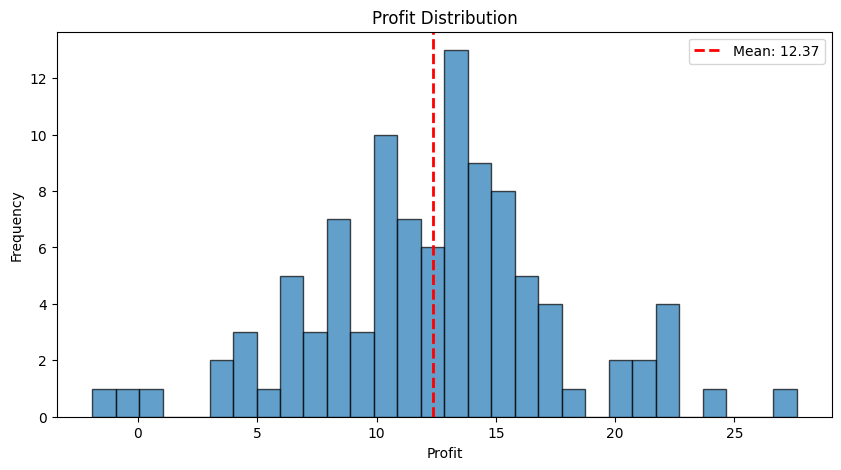

Number of positive returns: 98/100 (98.00%)
Mean return: 12.37


In [49]:
num_positive = sum(p > 0 for p in final_profits)
mean_return = np.mean(final_profits)
plt.figure(figsize=(10, 5))
plt.hist(final_profits, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_return, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_return:.2f}')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(f"Number of positive returns: {num_positive}/{len(final_profits)} ({num_positive / len(final_profits) * 100:.2f}%)")
print(f"Mean return: {mean_return:.2f}")

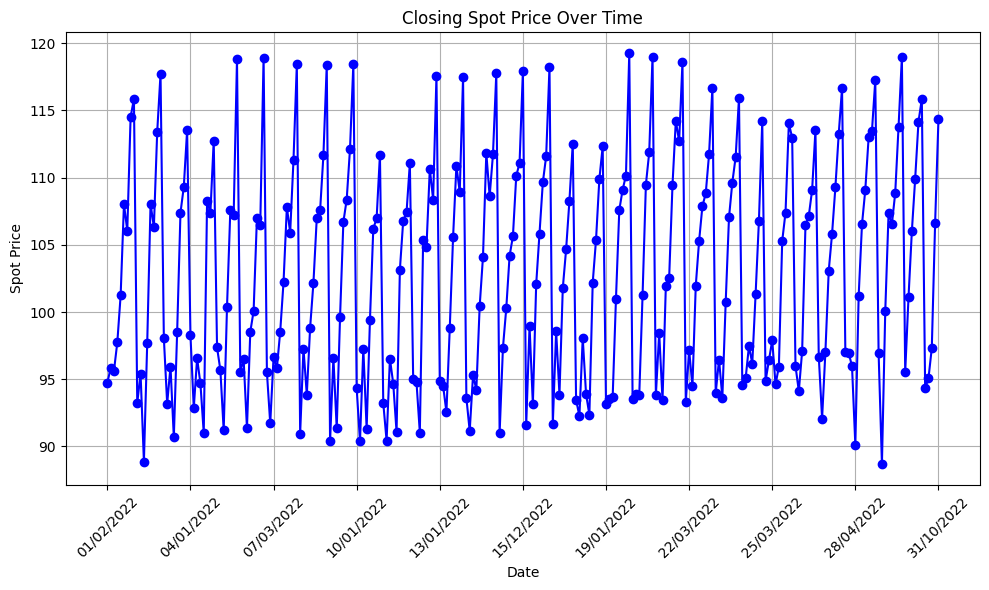

In [50]:
closing_prices = df.groupby('Date')['Spot'].last()
plt.figure(figsize=(10,6))
plt.plot(closing_prices.index, closing_prices.values, marker='o', linestyle='-', color='b')
plt.title('Closing Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.grid(True)
N = max(1, len(closing_prices) // 10) 
plt.xticks(closing_prices.index[::N], rotation=45)
plt.tight_layout()
plt.show()

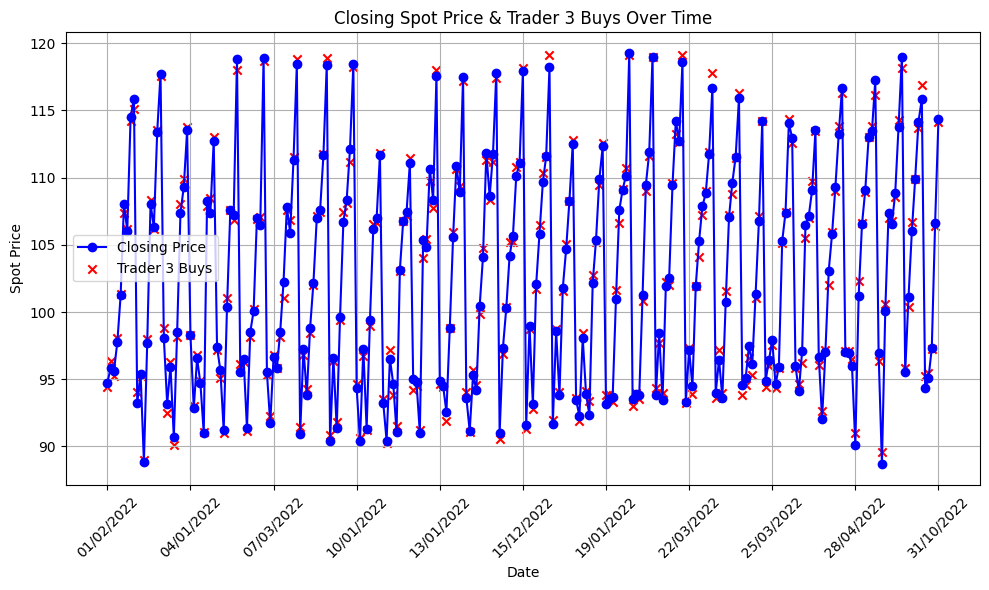

In [51]:

trader_3_buys = df[df["BuyTrader"] == 3].groupby("Date")["Spot"].mean()  # Use mean if multiple buys in a day

# Plot Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(closing_prices.index, closing_prices.values, marker="o", linestyle="-", color="b", label="Closing Price")

# Overlay Trader 3's Buys as Red Dots
plt.scatter(trader_3_buys.index, trader_3_buys.values, color="r", marker="x", label="Trader 3 Buys")

# Formatting
plt.title("Closing Spot Price & Trader 3 Buys Over Time")
plt.xlabel("Date")
plt.ylabel("Spot Price")
plt.grid(True)
N = max(1, len(closing_prices) // 10)  # Reduce number of x-ticks
plt.xticks(closing_prices.index[::N], rotation=45)
plt.legend()
plt.tight_layout()


plt.show()
